In [1]:
import matplotlib.pyplot as plt, pandas as pd, seaborn as sns , math
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from numpy import log, dot, e
from numpy.random import rand
print(f"setup done at {datetime.now()}")

setup done at 2022-02-07 21:38:13.081446


In [2]:
class LogisticRegressionScratch:
    
    def sigmoid(self, z): 
        return 1 / (1 + e**(-z))
    
    def cost_function(self, X, y, weights):                 
        z = dot(X, weights)
        predict_1 = y * log(self.sigmoid(z))
        predict_0 = (1 - y) * log(1 - self.sigmoid(z))
        return -sum(predict_1 + predict_0) / len(X)
    
    def fit(self, X, y, iter, lr):        
        loss = []
        weights = rand(X.shape[1])
        N = len(X) 
        for i in range(iter):
            y_hat = self.sigmoid(dot(X, weights))
            weights -= lr * dot(X.T,  y_hat - y) / N
            loss.append(self.cost_function(X, y, weights)) 
            
        self.weights = weights
        self.loss = loss
    
    def predict(self, X):       
        z = dot(X, self.weights)
        return [1 if i > 0.5 else 0 for i in self.sigmoid(z)]

In [3]:
data = pd.read_csv("sobar-72.csv")
X = data.iloc[:,:-1]
scaler = StandardScaler()  
X = scaler.fit_transform(X)
y = data.iloc[:,-1]
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.1,random_state=1)
# assert all((X_train.columns) == (X_test.columns))
print(X_train.shape,y_train.shape,"\n",X_test.shape,y_test.shape)

(64, 19) (64,) 
 (8, 19) (8,)


In [4]:
data.head()

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
0,10,13,12,4,7,9,10,1,8,7,3,14,8,5,7,12,12,11,8,1
1,10,11,11,10,14,7,7,5,5,4,2,15,13,7,6,5,5,4,4,1
2,10,15,3,2,14,8,10,1,4,7,2,7,3,3,6,11,3,3,15,1
3,10,11,10,10,15,7,7,1,5,4,2,15,13,7,4,4,4,4,4,1
4,8,11,7,8,10,7,8,1,5,3,2,15,5,3,6,12,5,4,7,1


In [9]:
model = LogisticRegressionScratch()
model.fit(X_train, y_train, 10000, 0.001)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_true=y_test,y_pred=y_pred)
print(f'accuracy = {accuracy}')

accuracy = 0.875


<Figure size 1440x1440 with 0 Axes>

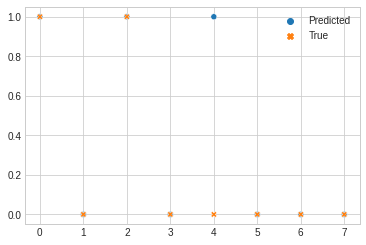

<Figure size 1440x1440 with 0 Axes>

In [10]:
# for last prediction
plt.style.use('seaborn-whitegrid')
sns.scatterplot(data = {"Predicted":y_pred,"True":y_test.tolist()})
plt.figure(figsize=(20,20))

In [11]:
from sklearn.linear_model import LogisticRegression
logisticRegression = LogisticRegression()
logisticRegression.fit(X_train,y_train)
predictions = logisticRegression.predict(X_test)
score = logisticRegression.score(X_test,y_test)
print(f"accuracy = {score}")

accuracy = 0.875


<Figure size 1440x1440 with 0 Axes>

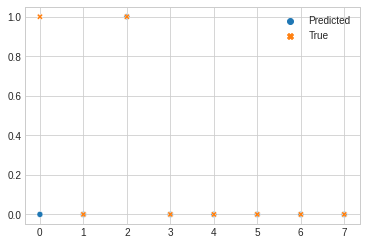

<Figure size 1440x1440 with 0 Axes>

In [12]:
# for last prediction
sns.scatterplot(data = {"Predicted":predictions,"True":y_test.tolist()})
plt.figure(figsize=(20,20))